In [2]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('dark_background')

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004 | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



#### Importação e tratamento dos microdados

Importação dos microdados

In [5]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004A', #Variáveis de interesse
                        'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação

colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
                        'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            if tri == 4:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
            if ano == 2021 & tri == 4:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [16]:
#Renomear colunas para não ter conflito no merge
pnad_2019_4.rename({'VD4004A':'VD4004'}, inplace=True)
pnad_2021_4.rename({'VD4004A':'VD4004'}, inplace=True)

In [23]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)

In [29]:
pnad_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487937 entries, 0 to 487936
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Ano         487937 non-null  int64  
 1   Trimestre   487937 non-null  int64  
 2   UPA         487937 non-null  int64  
 3   UF          487937 non-null  object 
 4   V1008       487937 non-null  int64  
 5   V1014       487937 non-null  int64  
 6   V2007       487937 non-null  int32  
 7   V2008       487937 non-null  int64  
 8   V20081      487937 non-null  int64  
 9   V20082      487937 non-null  int64  
 10  V2010       487937 non-null  object 
 11  VD4001      396112 non-null  object 
 12  VD4002      230703 non-null  object 
 13  VD4003      165409 non-null  object 
 14  VD4004A     15315 non-null   object 
 15  V1028       487937 non-null  float64
 16  V1029       487937 non-null  int64  
 17  V1033       487937 non-null  int64  
 18  posest      487937 non-null  int64  
 19  po

In [28]:
pnad_2021_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461795 entries, 0 to 461794
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Ano         461795 non-null  int64  
 1   Trimestre   461795 non-null  int64  
 2   UPA         461795 non-null  int64  
 3   UF          461795 non-null  object 
 4   V1008       461795 non-null  int64  
 5   V1014       461795 non-null  int64  
 6   V2007       461795 non-null  int32  
 7   V2008       461795 non-null  int64  
 8   V20081      461795 non-null  int64  
 9   V20082      461795 non-null  int64  
 10  V2010       461795 non-null  object 
 11  VD4001      379443 non-null  object 
 12  VD4002      216287 non-null  object 
 13  VD4003      163156 non-null  object 
 14  VD4004A     15664 non-null   object 
 15  V1028       461795 non-null  float64
 16  V1029       461795 non-null  int64  
 17  V1033       461795 non-null  int64  
 18  posest      461795 non-null  int64  
 19  po

0         110000016
1         110000016
2         110000016
3         110000016
4         110000016
            ...    
482113    530057544
482114    530057544
482115    530057544
482116    530057544
482117    530057544
Name: UPA, Length: 4633736, dtype: object

In [24]:
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004': pnadc_completa['VD4004'],
    'S01021': pnadc_completa['S01021'],
    #Expansão
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

TypeError: can only concatenate str (not "int") to str

In [21]:
#Conversão das variável V2007(sexo) para inteira para criar ID do indivíduo. (Homem = 0, Mulher = 1)
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [6]:
#Organização das variáveis e criação da chave de ID do indivíduo em cada dataframe.

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })

In [7]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4_id_sit, 
                            pnad_2020_1_id_sit, 
                            pnad_2020_2_id_sit, 
                            pnad_2020_3_id_sit, 
                            pnad_2020_4_id_sit, 
                            pnad_2021_1_id_sit, 
                            pnad_2021_2_id_sit, 
                            pnad_2021_3_id_sit, 
                            pnad_2021_4_id_sit, 
                            pnad_2022_1_id_sit, 
                            pnad_2022_2_id_sit])

In [23]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [24]:
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

In [27]:
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

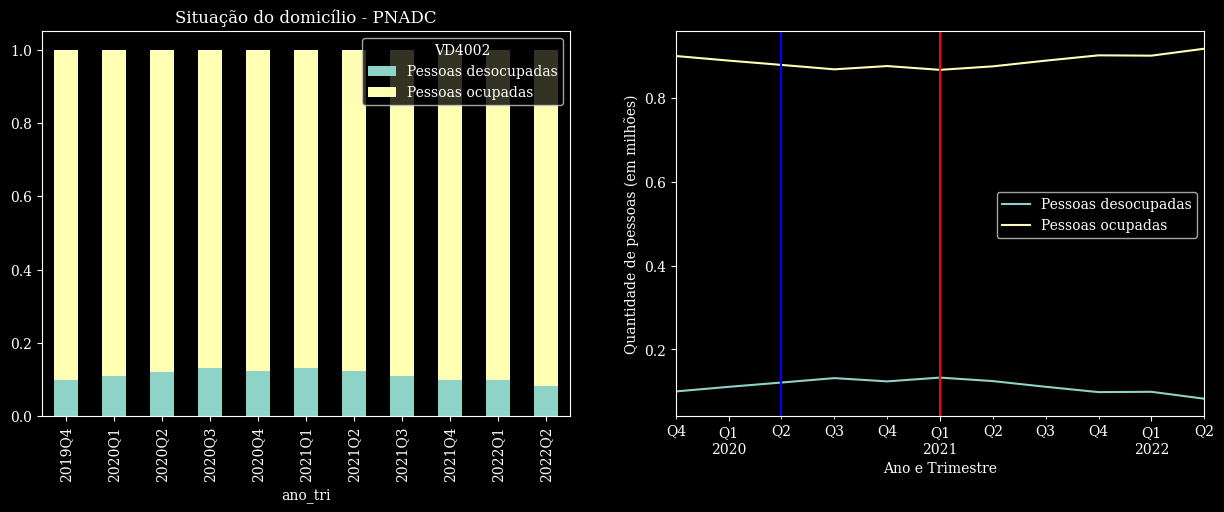

In [29]:
situacao_expandida = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['VD4002'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index')                            

fig, ax = plt.subplots(1, 2, figsize=(15,5))

situacao_expandida.plot(ax=ax[0], kind='bar', stacked=True, title='Situação do domicílio - PNADC')

situacao_expandida.plot(ax=ax[1])

plt.legend(bbox_to_anchor=(1, 0.6), loc='upper right', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')

plt.show()

Fluxo de desemprego

In [31]:
fluxo1 = pnadc_completa[(pnadc_completa['ano_tri']=='2019Q4')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxo2 = pnadc_completa[(pnadc_completa['ano_tri']=='2020Q1')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxos = pd.merge(fluxo1, fluxo2, on='ID', how='inner')
fluxos.columns = ['ID', 'VD4002 2019', 'VD4002 2020']

In [32]:
fluxos

,ID,VD4002 2019,VD4002 2020
0,110002003,Pessoas ocupadas,Pessoas ocupadas
1,110002020,Pessoas ocupadas,Pessoas ocupadas
2,110002036,Pessoas ocupadas,Pessoas ocupadas
3,110002036,Pessoas ocupadas,Pessoas ocupadas
4,110002036,Pessoas ocupadas,Pessoas ocupadas
...,...,...,...
236836,530046445,Pessoas ocupadas,Pessoas ocupadas
236837,530046470,Pessoas ocupadas,Pessoas ocupadas
236838,530046483,Pessoas ocupadas,Pessoas ocupadas
236839,530046462,Pessoas ocupadas,Pessoas ocupadas


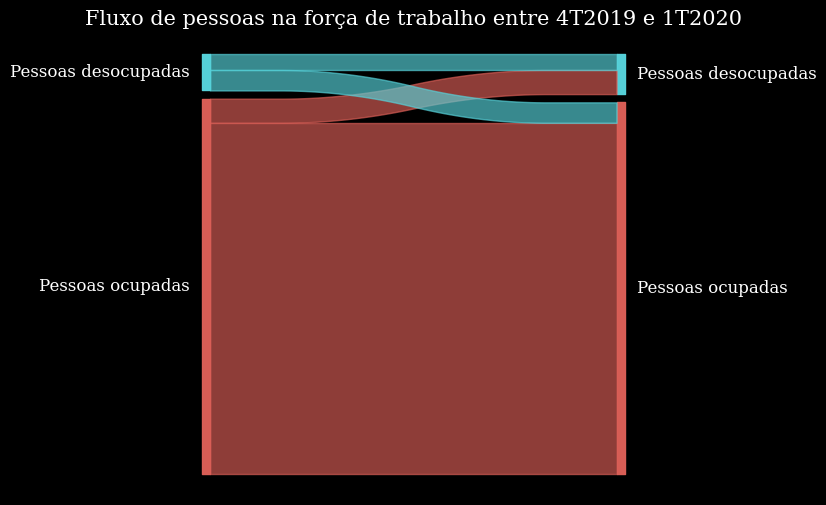

In [33]:
from pySankey.sankey import sankey


sankey(fluxos["VD4002 2019"], fluxos["VD4002 2020"], aspect=20, fontsize=12, )
plt.title('Fluxo de pessoas na força de trabalho entre 4T2019 e 1T2020', fontsize=15)
plt.show()

In [34]:
situacao = pd.crosstab(index=pnadc_completa['VD4002'],
                            columns=pnadc_completa['ano_tri'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum')

In [35]:
situacao.reset_index(inplace=True)